# Introduction
This dataset provides valuable insights into the world of books available on a book depository, encompassing a wealth of information, including titles, descriptions, unique identifiers, publication details, and a variety of attributes related to their physical characteristics. One of the significant attributes is the format of these books, which often influences their handling, shipping, and reader experience. The format may range from hardcover to paperback, e-books, and other variants, each tailored to meet different reader preferences and industry demands.

# Columns Present
- **authors** : list of authors
- **bestseller-rank** : Bestseller ranking
- **categories** : List of all categories (genres)
- **description** : Description(string)
- **dimension-x** : Dimension along x axis (float in cms)
- **dimension-y** : Dimension along y axis (float in cms)
- **dimension-z** : Dimension along z axis (float in cms)
- **edition** : Edition (string)
- **edition-statement** : Edition statement (string)
- **for-ages** : Ranges of ages 
- **format** : Format 
- **id** : Unique Identifier
- **illustration-note**
- **image-checksum** : Cover Image checksum
- **image-path** : Cover image file path
- **image-url** : Cover image url
- **imprint**
- **index-date** : Crawling date 
- **isbn10** : ISBN-10
- **isbn13** : ISBN-13 
- **lang** : List of languages of book
- **publication-date** : Publication date
- **publication-place** : Publication place
- **rating-avg** : Rating average (0-5)
- **rating-count** : Number of ratings 
- **title** : Book's title 
- **url** : Relative URL (https://bookdepository.com + url)
- **weight** : Weight of book


# Preprocessing and EDA

In [2]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ast
import plotly.express as px
from wordcloud import WordCloud
import itertools
from itertools import combinations
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

df0 = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/dataset.csv')
df0_a = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/authors.csv')
df0_c = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/categories.csv')
df0_p = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/places.csv')
df0_f = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/formats.csv')

In [3]:
df0.rename(columns={'id' : 'book_id'} , inplace=True)
df0.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'book_id',
       'illustrations-note', 'image-checksum', 'image-path', 'image-url',
       'imprint', 'index-date', 'isbn10', 'isbn13', 'lang', 'publication-date',
       'publication-place', 'rating-avg', 'rating-count', 'title', 'url',
       'weight'],
      dtype='object')

In [4]:
df0_a.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [5]:
df0_f.head()

,format_id,format_name
0,21,Address
1,5,Audio
2,27,Bath
3,44,Big
4,14,Board


In [6]:
df0_c.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [7]:
df0.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      749037
for-ages              1033390
format                   6622
book_id                     0
illustrations-note     753737
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

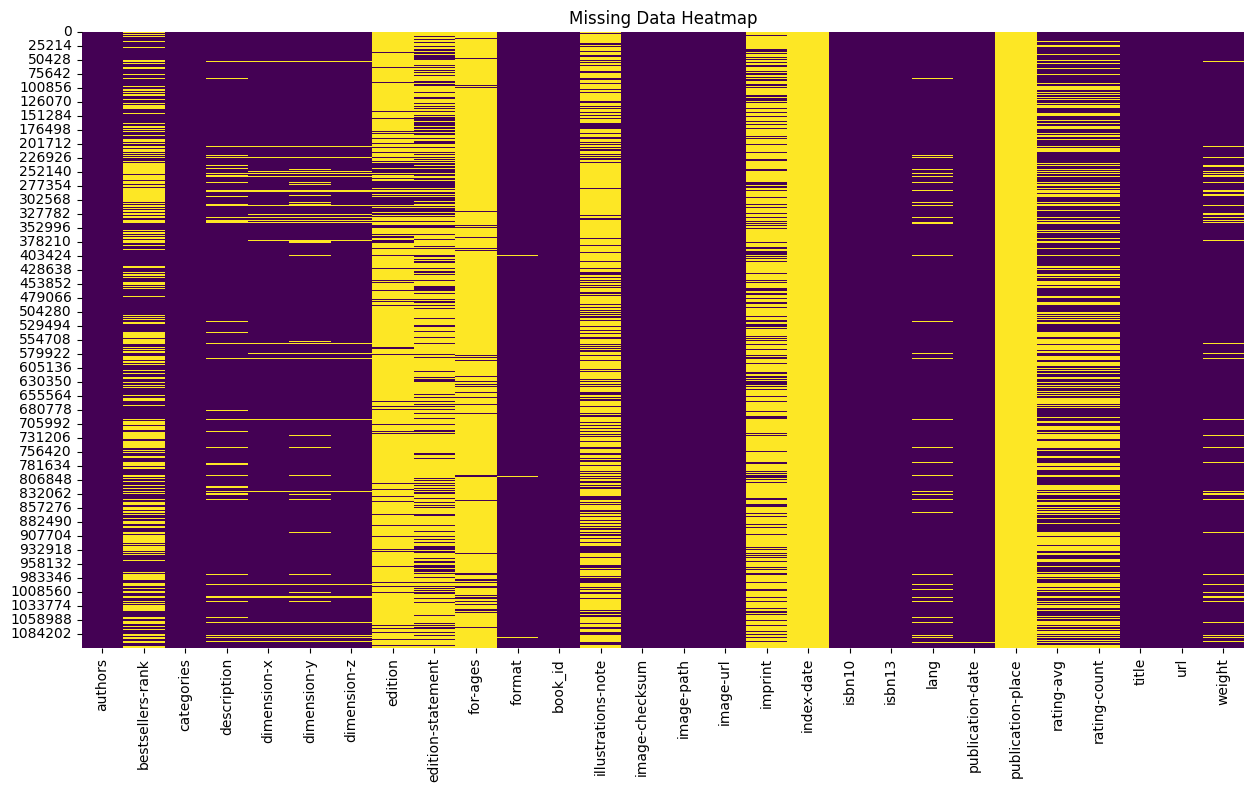

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(df0.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

**Note** : In this dataset, we encounter a classification challenge wherein we aim to categorize readers into different age groups based on the information provided in the book titles and descriptions. However, it's worth noting that the "for-ages" column, which could have been a valuable source of information for this task, contains a significant number of missing values (as we can see in missing value heatmap), rendering it unsuitable for use in this particular classification problem.

- Here categories are given as string representation. So we have to convert it into list of integeres.

In [8]:
df = df0[[ 'book_id','categories' , 'description' , 'title']];
# Coverting string representation to list of integeres
df.loc[:, 'categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df_merged = df.explode('categories').merge(df0_c , left_on='categories' , right_on='category_id' , how='left')

**We can do qualitative analysis of Number of books belonging to categories using word cloud.**

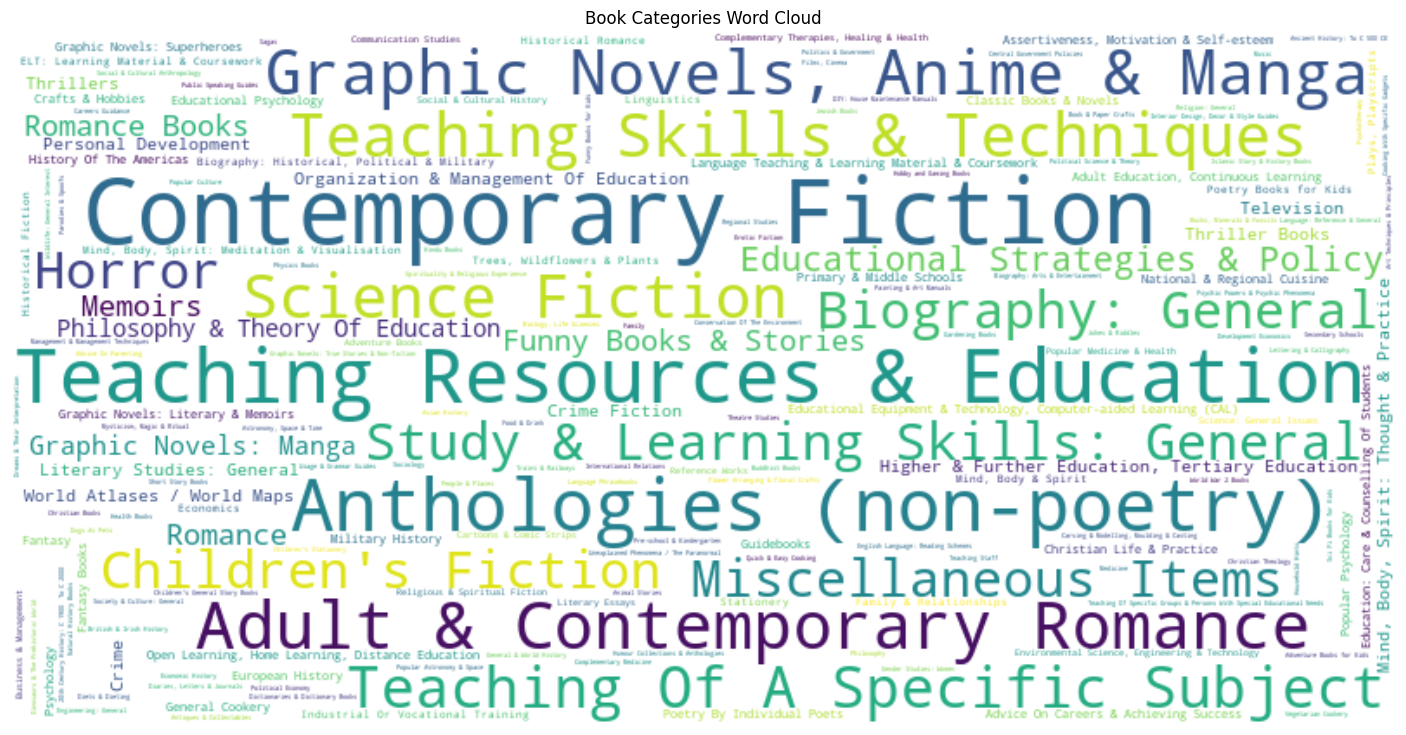

In [9]:
category_counts = df_merged['category_name'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Book Categories Word Cloud')
plt.show()

We can see that there is a larger number of books falling into the following categories :
- Contemporary Fiction
- Teaching Resources & Education
- Children Fiction
- Horror
- Science Fiction
- Graphic Novels ,Anime & Manga
- Anthologies (non - poetry)
- Study & Learning Skills : General
- Miscellaneous Items

For detailed visualization , we can use other technique like treemap.

In [11]:
category_counts = df_merged['category_name'].value_counts().reset_index()
category_counts.columns = ['Category Name', 'Number of Books']
# Create a treemap using Plotly Express
fig = px.treemap(category_counts, path=['Category Name'], values='Number of Books', labels={'Category Name': 'Category', 'Number of Books': 'Count'})
fig.show()

- Now let's explore relations between  format , weight and dimensions of the books.
- First of all we will remove Instances with null attributes.

In [12]:
df0.dropna(subset=['weight'] , inplace=True)
df0.dropna(subset=['dimension-x'] , inplace=True)
df0.dropna(subset=['dimension-y'] , inplace=True)
df0.dropna(subset=['dimension-z'] , inplace=True)
df0.dropna(subset=['format'] , inplace=True)
df0 = df0.merge(df0_f , left_on='format' , right_on='format_id')



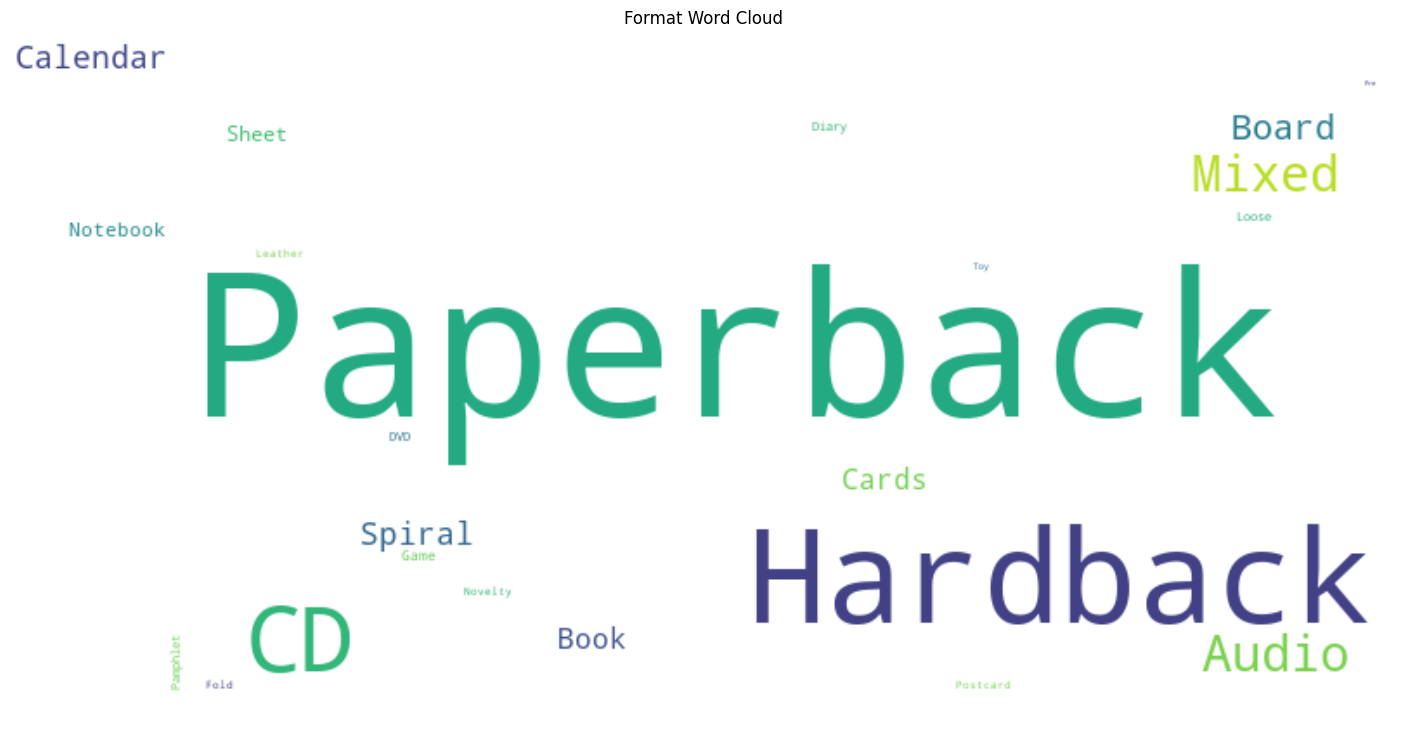

In [13]:

format_cnts = df0['format_name'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(format_cnts)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Format Word Cloud')
plt.show()

Here we can see that some of the significant formats are Hardback , Paperback ,CD , Audio , Calender , Cards and Spiral. 

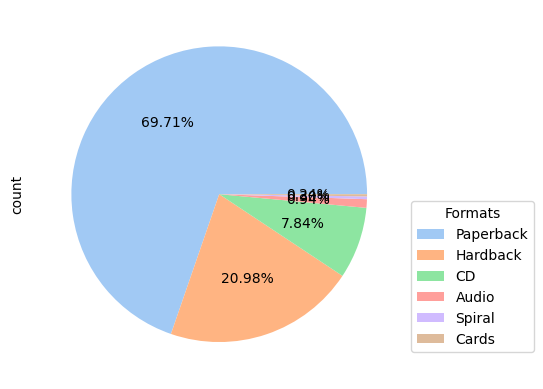

In [14]:
filtered_df = df0.loc[df0['format_name'].isin(['Hardback' , 'Paperback' , 'CD' , 'Audio' , 'Calender' , 'Cards' , 'Spiral'])]
filtered_df = filtered_df[['book_id','dimension-x' , 'dimension-y' , 'dimension-z' , 'weight' , 'format' , 'format_name']]
format_cnts = filtered_df['format_name'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(format_cnts)];
format_cnts.plot(kind = 'pie', colors=piec_colors , labels = None , autopct = '%1.2f%%')
plt.legend(format_cnts.index, title='Formats', loc='best', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()



- Paperback, Hardback, and CD constitute about 98% of all formats in the dataset. So we will consider only these three formats

In [29]:
filtered_df = filtered_df.loc[filtered_df['format_name'].isin(['Paperback' , 'Hardback' , 'CD'])]

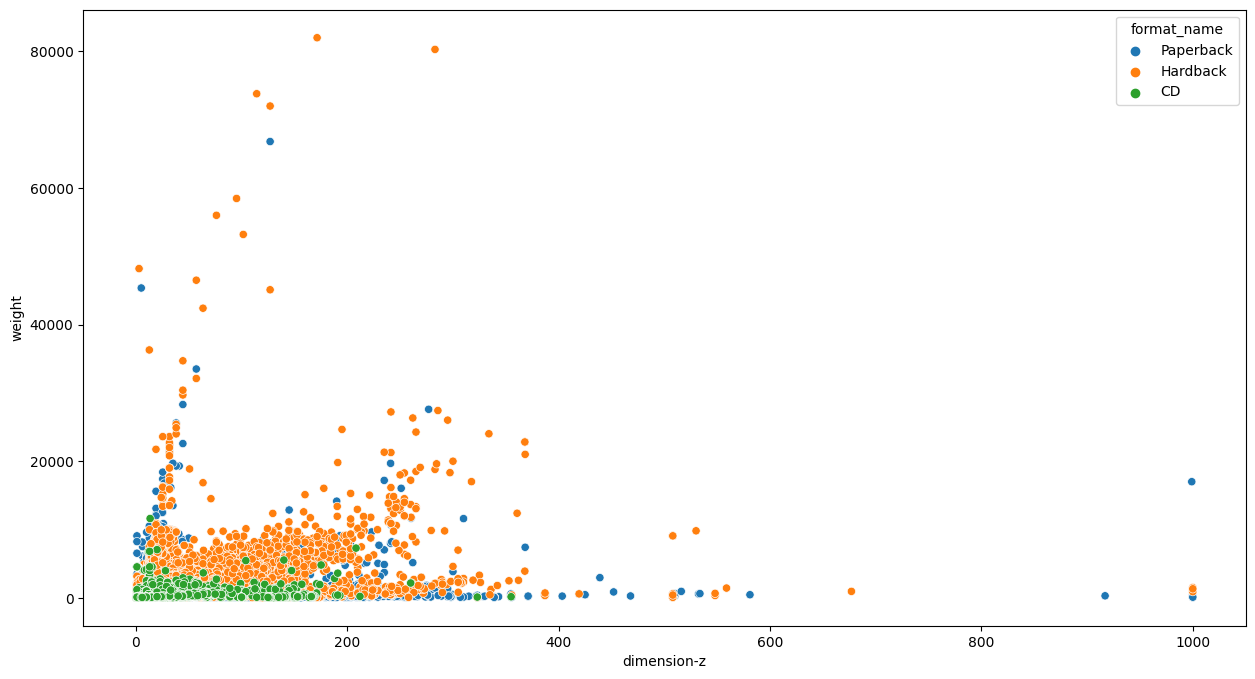

In [60]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-z"], y=filtered_df["weight"], hue=filtered_df["format_name"],legend="full")

**Inference**: Based on the scatter plot above, it's evident that CDs tend to have smaller dimension-z values and are relatively lightweight. In contrast, hardback books exhibit significantly higher weights. Paperback books, on the other hand, fall in between with intermediate dimension-z and weight values.

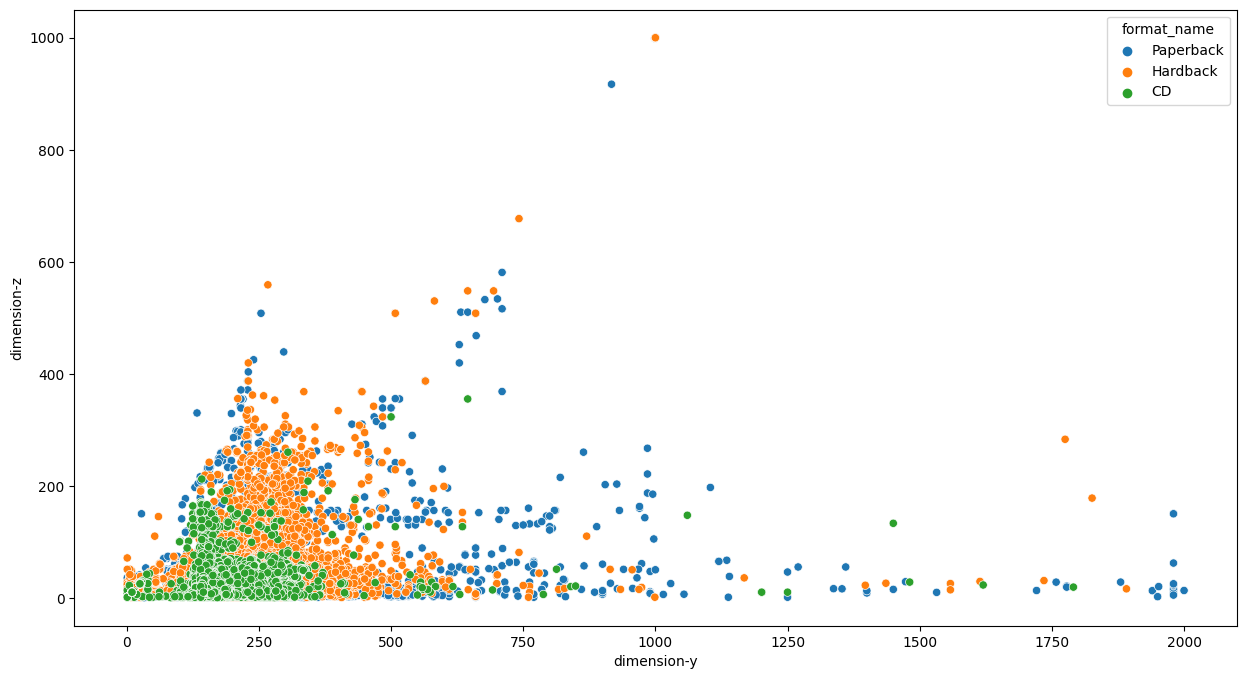

In [17]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-y"], y=filtered_df["dimension-z"], hue=filtered_df["format_name"],legend="full")

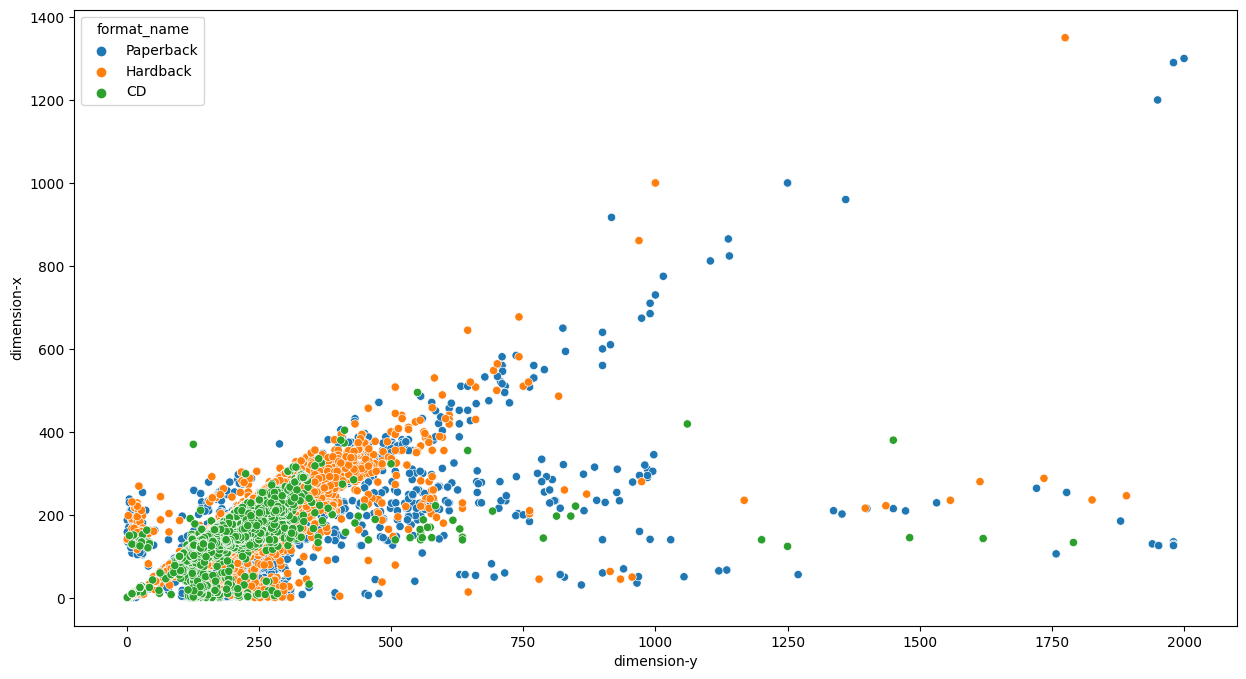

In [18]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-y"], y=filtered_df["dimension-x"], hue=filtered_df["format_name"],legend="full")

**Inference**: Based on the scatter plot above, it's evident that CDs tend to have equal dimension-x and dimension -y values. Also paperback books exhibit significantly higher dimension-y values. While hardback books, on the other hand, have intermediate dimension-y value.

# Classification Problems 

We have identified three classification tasks:

- The first task involves classifying a book's genre using its title and description, but it is unattainable due to computational resource limitations.
- The second problem seeks to classify a book's rating based on its title, description, and author information. Unfortunately, this classification task is also beyond our reach due to computational constraints.
- The third classification problem entails categorizing a book's format using its dimension-x, dimension-y, dimension-z, and weight.

In [19]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X = filtered_df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = filtered_df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 50, 100],
    'min_samples_leaf':  [4 , 40 , 100],
}

In [22]:
# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [4, 40, 100],
                         'min_samples_split': [10, 50, 100]},
             scoring='accuracy')

In [23]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 50}


In [24]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8875922975182512
              precision    recall  f1-score   support

         1.0       0.91      0.93      0.92    136113
         2.0       0.77      0.71      0.74     40708
         3.0       0.96      0.96      0.96     15221

    accuracy                           0.89    192042
   macro avg       0.88      0.87      0.87    192042
weighted avg       0.89      0.89      0.89    192042



- **Through the application of a decision tree classifier, we were able to obtain an accuracy of 88.75%. This signifies that our model correctly predicted book format with an accuracy rate of nearly 89%.**

In [40]:
from sklearn.ensemble import RandomForestClassifier

X = filtered_df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = filtered_df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9003395090657252


- **Through the application of a random forest classifier, we were able to obtain an accuracy of 90.03%. This signifies that our model correctly predicted book format with an accuracy rate of nearly 90%.**

In [25]:
X = filtered_df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = filtered_df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C' : [0.1 , 1 , 10],
    'penalty': ['l2', 'l1'],
    'max_iter' : [500 , 1000 , 1500]
}

clf = LogisticRegression()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [500, 1000, 1500],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [35]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}


In [36]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.7812665979317024
              precision    recall  f1-score   support

         1.0       0.79      0.95      0.86    136113
         2.0       0.64      0.22      0.33     40708
         3.0       0.81      0.80      0.80     15221

    accuracy                           0.78    192042
   macro avg       0.75      0.66      0.66    192042
weighted avg       0.76      0.78      0.74    192042



- **Through the application of a logistic regression, we were able to obtain an accuracy of 78.12%. This signifies that our model correctly predicted book format with an accuracy rate of nearly 78%.**

**Therefore we can conclude that random forest classifier can predict the format of the book from the given  dimension-x,dimension-y, dimension-z and weight of the book with the maximum probability (nearly 90%).**